In [2]:
#Cross-validation with ShuffleSplit

Text(0.5, 1.0, 'Histogram of dataset')

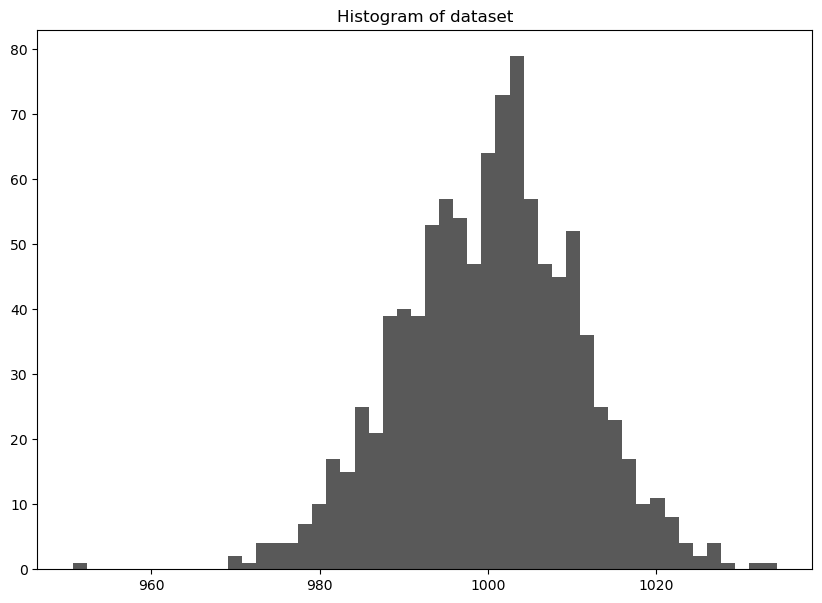

In [4]:
%matplotlib inline

import numpy as np
true_mean = 1000
true_std = 10
N = 1000
dataset = np.random.normal(loc= true_mean, scale = true_std, size=N)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 7))
ax.hist(dataset, color='k', alpha=.65, histtype='stepfilled',bins=50)
ax.set_title("Histogram of dataset")

In [8]:
import pandas as pd
import numpy as np

# Sample dataset creation for demonstration
# Replace this with your actual dataset
data = {
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'target': np.random.rand(1000)
}
dataset = pd.DataFrame(data)

# Create holdout and fitting sets
holdout_set = dataset[:500]
fitting_set = dataset[500:]

# Define N as the number of rows in the fitting set
N = len(fitting_set)

# Calculate the mean estimate from the first half of the fitting set
estimate = fitting_set[:N//2].mean()

print("Estimate from the first half of the fitting set:")
print(estimate)


Estimate from the first half of the fitting set:
feature1    0.484213
feature2    0.516647
target      0.475390
dtype: float64


In [10]:
data_mean = dataset.mean()
data_mean

feature1    0.503252
feature2    0.506894
target      0.488032
dtype: float64

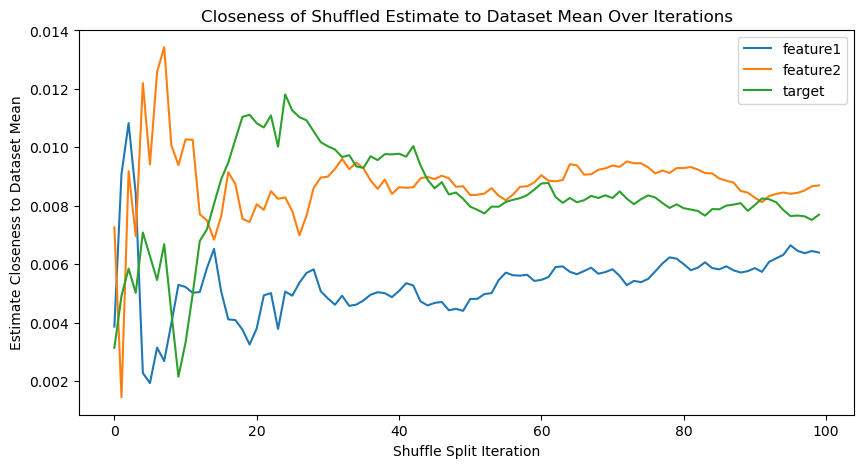

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Sample dataset creation for demonstration
# Replace this with your actual dataset
data = {
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'target': np.random.rand(1000)
}
dataset = pd.DataFrame(data)

# Create holdout and fitting sets
holdout_set = dataset[:500]
fitting_set = dataset[500:]

# Initialize ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=100, test_size=0.5, random_state=0)

mean_p = []
estimate_closeness = []

# Perform ShuffleSplit
for train_index, _ in shuffle_split.split(fitting_set):
    mean_p.append(fitting_set.iloc[train_index].mean())
    shuf_estimate = np.mean(mean_p, axis=0)
    estimate_closeness.append(np.abs(shuf_estimate - dataset.mean()))

# Convert estimate_closeness to a DataFrame for easier plotting
estimate_closeness_df = pd.DataFrame(estimate_closeness)

# Plot the closeness of the shuffled estimate to the dataset mean
plt.figure(figsize=(10, 5))
plt.plot(estimate_closeness_df)
plt.xlabel('Shuffle Split Iteration')
plt.ylabel('Estimate Closeness to Dataset Mean')
plt.title('Closeness of Shuffled Estimate to Dataset Mean Over Iterations')
plt.legend(estimate_closeness_df.columns, loc='best')
plt.show()
